# Example 1b: Spin-Bath model (Underdamped Case)
### Introduction

The HEOM method solves the dynamics and steady state of a system and its environment, the latter of which is encoded in a set of auxiliary density matrices.

In this example we show the evolution of a single two-level system in contact with a single Bosonic environment.  The properties of the system are encoded in Hamiltonian, and a coupling operator which describes how it is coupled to the environment.

The Bosonic environment is implicitly assumed to obey a particular Hamiltonian (see paper), the parameters of which are encoded in the spectral density, and subsequently the free-bath correlation functions.

In the example below we show how to model the underdamped Brownian motion Spectral Density.

### Drude-Lorentz (overdamped) spectral density

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.

###  Brownian motion (underdamped) spectral density
The underdamped spectral density is:

$$J_U = \frac{\alpha^2 \Gamma \omega}{(\omega_c^2 - \omega^2)^2 + \Gamma^2 \omega^2)}.$$

Here $\alpha$  scales the coupling strength, $\Gamma$ is the cut-off frequency, and $\omega_c$ defines a resonance frequency.  With the HEOM we must use an exponential decomposition:

The Matsubara decomposition of this spectral density is, in real and imaginary parts:



\begin{equation*}
    c_k^R = \begin{cases}
               \alpha^2 \coth(\beta( \Omega + i\Gamma/2)/2)/4\Omega & k = 0\\
               \alpha^2 \coth(\beta( \Omega - i\Gamma/2)/2)/4\Omega & k = 0\\
              -2\alpha^2\Gamma/\beta \frac{\epsilon_k }{((\Omega + i\Gamma/2)^2 + \epsilon_k^2)(\Omega - i\Gamma/2)^2 + \epsilon_k^2)}      & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^R = \begin{cases}
               -i\Omega  + \Gamma/2, i\Omega  +\Gamma/2,             & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}




\begin{equation*}
    c_k^I = \begin{cases}
               i\alpha^2 /4\Omega & k = 0\\
                -i\alpha^2 /4\Omega & k = 0\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^I = \begin{cases}
               i\Omega  + \Gamma/2, -i\Omega  + \Gamma/2,             & k = 0\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.



In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from bofin.heom import BosonicHEOMSolver

In [4]:

def cot(x):
    return 1./np.tan(x)


def coth(x):
    """
    Calculates the coth function.
    
    Parameters
    ----------
    x: np.ndarray
        Any numpy array or list like input.
        
    Returns
    -------
    cothx: ndarray
        The coth function applied to the input.
    """
    return 1/np.tanh(x)

In [5]:
# Defining the system Hamiltonian
eps = .5     # Energy of the 2-level system.
Del = 1.0    # Tunnelling term
Hsys = 0.5 * eps * sigmaz() + 0.5 * Del* sigmax()




In [6]:
# Initial state of the system.
rho0 = basis(2,0) * basis(2,0).dag()  



In [7]:
# System-bath coupling (Drude-Lorentz spectral density)
Q = sigmaz() # coupling operator

#solver time steps
nsteps = 1000
tlist = np.linspace(0, 50, nsteps)


#correlation function plotting time steps
tlist_corr = np.linspace(0, 20, 1000)

#Bath properties:
gamma = .1 # cut off frequency
lam = .5 # coupling strenght
w0 = 1 #resonance frequency
T = 1
beta = 1./T



#HEOM parameters
NC = 10 # cut off parameter for the bath




Text(0, 0.5, 'J')

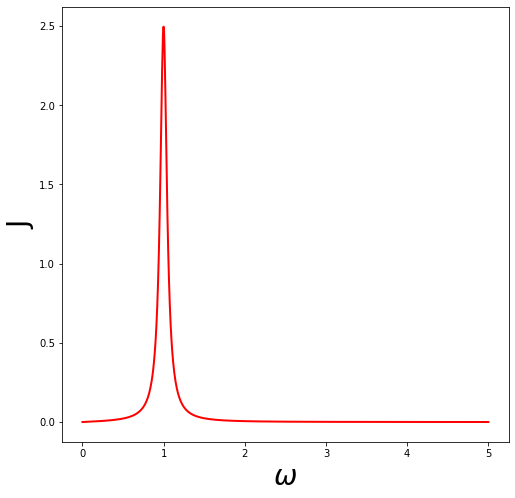

In [8]:

#Spectral Density


wlist = np.linspace(0, 5, 1000)
pref = 1.

J = [lam**2 * gamma * w / ((w0**2-w**2)**2 + (gamma**2)*(w**2)) for w in wlist]

# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist, J, 'r', linewidth=2)
axes.set_xlabel(r'$\omega$', fontsize=28)
axes.set_ylabel(r'J', fontsize=28)



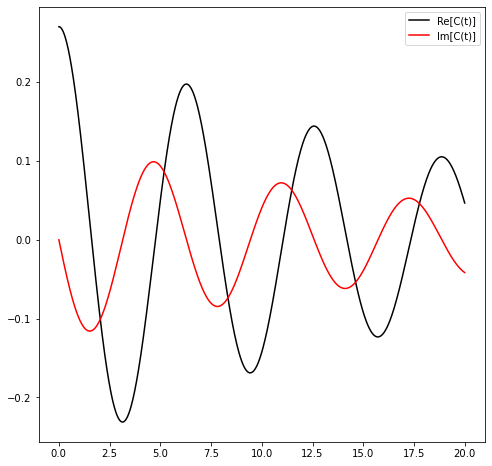

In [9]:
#first of all lets look athe correlation functions themselves
Nk = 3 # number of exponentials 

Om = np.sqrt(w0**2 - (gamma/2)**2)
Gamma = gamma/2.

#mats
def Mk(t,k):
    ek = 2*pi*k/beta
    
    return (-2*lam**2*gamma/beta)*ek*exp(-ek*abs(t))/(((Om+1.0j*Gamma)**2+ek**2)*((Om-1.0j*Gamma)**2+ek**2))


def c(t):
    Cr = coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t)+coth(beta*(Om-1.0j*Gamma)/2)*exp(-1.0j*Om*t)
    #Cr = coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t)+conjugate(coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t))
    Ci = exp(-1.0j*Om*t)-exp(1.0j*Om*t)
    return (lam**2/(4*Om))*exp(-Gamma*abs(t))*(Cr+Ci) + sum([Mk(t,k) for k in range(1,Nk+1)])


plt.figure(figsize=(8,8))


plt.plot(tlist_corr ,[real(c(t)) for t in tlist_corr ], '-', color="black", label="Re[C(t)]")
plt.plot(tlist_corr ,[imag(c(t)) for t in tlist_corr ], '-', color="red", label="Im[C(t)]")

plt.legend()
plt.show()


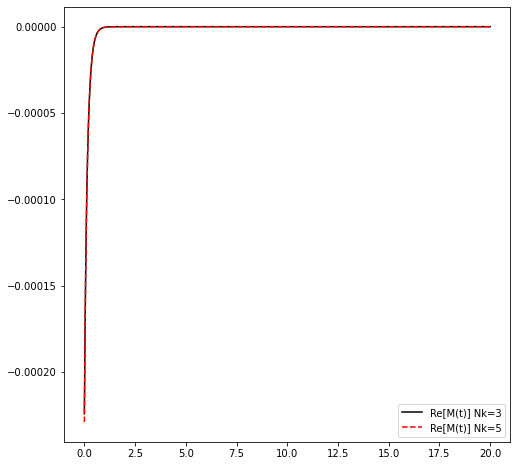

In [10]:
#The Matsubara terms modify the real part
Nk = 3# number of exponentials 

Om = np.sqrt(w0**2 - (gamma/2)**2)
Gamma = gamma/2.

#mats
def Mk(t,k):
    ek = 2*pi*k/beta
    
    return (-2*lam**2*gamma/beta)*ek*exp(-ek*abs(t))/(((Om+1.0j*Gamma)**2+ek**2)*((Om-1.0j*Gamma)**2+ek**2))



plt.figure(figsize=(8,8))


plt.plot(tlist_corr ,[sum([real(Mk(t,k)) for k in range(1,4)]) for t in tlist_corr ], '-', color="black", label="Re[M(t)] Nk=3")

plt.plot(tlist_corr ,[sum([real(Mk(t,k)) for k in range(1,6)]) for t in tlist_corr ], '--', color="red", label="Re[M(t)] Nk=5")


plt.legend()
plt.show()


In [11]:
#Lets collate the parameters for the HEOM

ckAR = [(lam**2/(4*Om))*coth(beta*(Om+1.0j*Gamma)/2),(lam**2/(4*Om))*coth(beta*(Om-1.0j*Gamma)/2)]


ckAR.extend([(-2*lam**2*gamma/beta)*( 2*pi*k/beta)/(((Om+1.0j*Gamma)**2+ (2*pi*k/beta)**2)*((Om-1.0j*Gamma)**2+( 2*pi*k/beta)**2))+0.j for k in range(1,Nk+1)])

vkAR = [-1.0j*Om+Gamma,1.0j*Om+Gamma]
vkAR.extend([2 * np.pi * k * T + 0.j for k in range(1,Nk+1)])


factor=1./4.


ckAI =[-factor*lam**2*1.0j/(Om),factor*lam**2*1.0j/(Om)]

vkAI = [-(-1.0j*(Om) - Gamma),-(1.0j*(Om) - Gamma)]


In [12]:
NC=14

In [15]:

NR = len(ckAR)
NI = len(ckAI)
Q2 = [Q for kk in range(NR+NI)]
print(Q2)
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)

HEOM = BosonicHEOMSolver(Hsys, Q2, ckAR, ckAI, vkAR, vkAI, NC, options=options)


result = HEOM.run(rho0, tlist)


[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]]


In [16]:
# Define some operators with which we will measure the system

# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(2,0) * basis(2,0).dag()
P22p=basis(2,1) * basis(2,1).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(2,0) * basis(2,1).dag()
# Calculate expectation values in the bases
P11 = expect(result.states, P11p)
P22 = expect(result.states, P22p)
P12= expect(result.states, P12p)



In [17]:
#DL = " 2*pi* 2.0 * {lam} / (pi * {gamma} * {beta})  if (w==0) else 2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {beta})-1))+1)".format(gamma=gamma, beta = beta, lam = lam)
UD = " 2* {lam}**2 * {gamma} / ( {w0}**4 * {beta})  if (w==0) else 2* ({lam}**2 * {gamma} * w /(({w0}**2 - w**2)**2 + {gamma}**2 * w**2)) * ((1/(exp((w) * {beta})-1))+1)".format(gamma = gamma, beta = beta, lam = lam, w0 = w0)


optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-12,atol=1e-12)
outputBR  =  brmesolve(Hsys, rho0, tlist, a_ops=[[sigmaz(),UD]], options = optionsODE)


# Calculate expectation values in the bases
P11BR = expect(outputBR.states, P11p)
P22BR = expect(outputBR.states, P22p)
P12BR = expect(outputBR.states, P12p)

#Prho0BR = expect(outputBR.states,rho0)

In [18]:
#This Thermal state of a reaction coordinate should, at high temperatures and not to broad baths, tell us the steady-state

dot_energy, dot_state = Hsys.eigenstates()
deltaE = dot_energy[1] - dot_energy[0]

gamma2 = gamma
wa = w0 # reaction coordinate frequency
g = lam/sqrt(2*wa)

#nb = (1 / (np.exp(wa/w_th) - 1))

NRC = 10

Hsys_exp = tensor(qeye(NRC), Hsys)
Q_exp = tensor(qeye(NRC), Q)
a = tensor(destroy(NRC), qeye(2))

H0 = wa * a.dag() * a + Hsys_exp
# interaction
H1 = (g * (a.dag() + a) * Q_exp)

H = H0 + H1

#print(H.eigenstates())
energies, states = H.eigenstates()
rhoss = 0*states[0]*states[0].dag()
for kk, energ in enumerate(energies):
    rhoss += (states[kk]*states[kk].dag()*exp(-beta*energies[kk])) 


rhoss = rhoss/rhoss.norm()

P12RC = tensor(qeye(NRC), basis(2,0) * basis(2,1).dag())

P12RC = expect(rhoss,P12RC)


P11RC = tensor(qeye(NRC), basis(2,0) * basis(2,0).dag())

P11RC = expect(rhoss,P11RC)




In [19]:
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['xtick.labelsize'] = 28
matplotlib.rcParams['ytick.labelsize'] = 28
matplotlib.rcParams['legend.fontsize'] = 28
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['font.family'] = 'STIXgeneral' 
matplotlib.rcParams['mathtext.fontset'] =  'stix'
matplotlib.rcParams["font.serif"] = "STIX"
matplotlib.rcParams['text.usetex'] = False

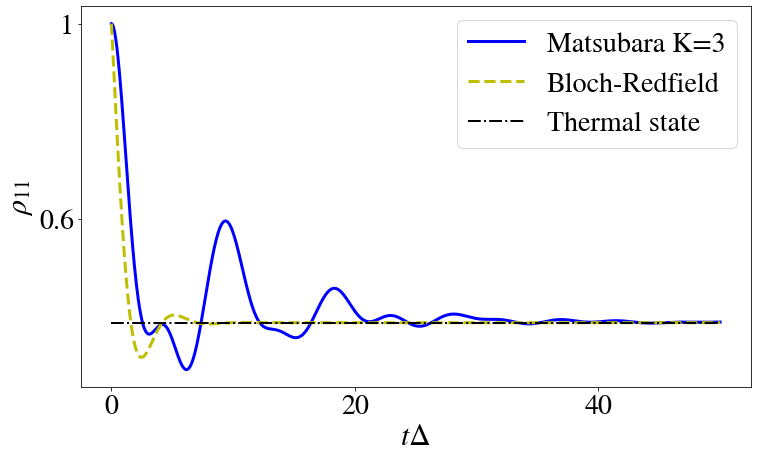

In [21]:


# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,7))
plt.yticks([0.6,1.0],[0.6,1])
axes.plot(tlist, np.real(P11), 'b', linewidth=3, label="Matsubara K=3")
axes.plot(tlist, np.real(P11BR), 'y--', linewidth=3, label="Bloch-Redfield")
axes.plot(tlist, [P11RC for t in tlist], color='black', linestyle="-.",linewidth=2, label="Thermal state")

axes.locator_params(axis='y', nbins=6)
axes.locator_params(axis='x', nbins=6)
axes.set_ylabel(r'$\rho_{11}$',fontsize=30)

axes.set_xlabel(r'$t \Delta$',fontsize=30)
axes.locator_params(axis='y', nbins=4)
axes.locator_params(axis='x', nbins=4)
#axes.set_xlim(0.0,100)
axes.legend(loc=0)
fig.savefig("figures/fig3.pdf")


In [ ]:
from qutip.ipynbtools import version_table

version_table()